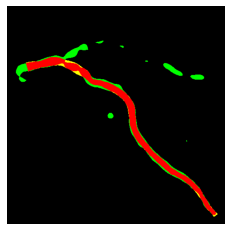

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to the images
image_path_output = '/workspaces/mmsegmentation-1/MAEOUT_240416/00000.png'
image_path_img = '/workspaces/mmsegmentation-1/data/cag/images/test/00000.png'
image_path_label = '/workspaces/mmsegmentation-1/data/cag/annotations/test/00000.png'


# Load the images using OpenCV
label_img = cv2.imread(image_path_label, 0)
img = cv2.imread(image_path_img)
output_img = cv2.imread(image_path_output, 0)

# Create masks for pixels where label and output are both 1, label is 1 but output is 0, and label is 0 but output is 1
true_mask = (label_img == 1) & (output_img == 1)
false_mask = (label_img == 1) & (output_img == 0)
the_false_mask = (label_img == 0) & (output_img == 1)

# Create an array to store the visualization
visualization = np.zeros((label_img.shape[0], label_img.shape[1], 3), dtype=np.uint8)

# Define colors
green = [0, 0, 255]   # Red for overlapping parts
yellow = [0, 255, 255]   # Yellow for parts where prediction is not possible
blue = [0, 255, 0]   # Green for parts where prediction is better

# Assign colors to the visualization array based on the masks
visualization[true_mask] = green
visualization[false_mask] = yellow
visualization[the_false_mask] = blue

# Display the result
plt.imshow(cv2.cvtColor(visualization, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


00000.png
IoU: 88.77
F1 Score: 94.05
Precision: 92.45
Recall: 95.71


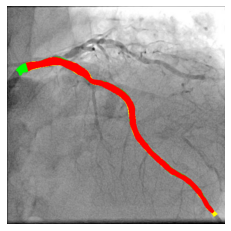

00001.png
IoU: 83.04
F1 Score: 90.73
Precision: 92.86
Recall: 88.71


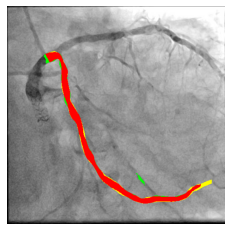

00002.png
IoU: 76.92
F1 Score: 86.96
Precision: 81.38
Recall: 93.35


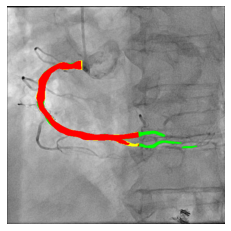

00003.png
IoU: 73.53
F1 Score: 84.75
Precision: 80.49
Recall: 89.48


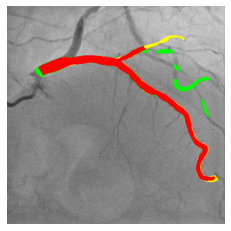

00004.png
IoU: 88.14
F1 Score: 93.69
Precision: 97.29
Recall: 90.36


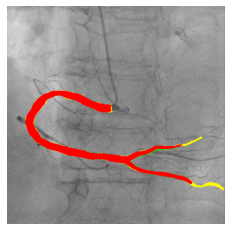

00005.png
IoU: 90.04
F1 Score: 94.76
Precision: 96.10
Recall: 93.46


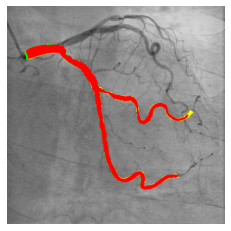

Average IoU: 83.41
Average F1 Score: 90.82
Average Precision: 90.09
Average Recall: 91.85


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

iou_list, f1_score_list, precision_list, recall_list = [],[],[],[]

file_name_list = os.listdir('/workspaces/mmsegmentation-1/OUTPUT/MAEOUT_240418/')
file_name_list = sorted(file_name_list)

def evaluate_segmentation(label, output):
    # Flatten label and output arrays
    label_flat = label.flatten()
    output_flat = output.flatten()

    # True positives, false positives, false negatives
    TP = np.sum(np.logical_and(label_flat == 1, output_flat == 1))
    FP = np.sum(np.logical_and(label_flat == 0, output_flat == 1))
    FN = np.sum(np.logical_and(label_flat == 1, output_flat == 0))

    # Intersection over Union (IoU)
    intersection = TP
    union = TP + FP + FN
    iou = intersection / union if union > 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    # F1 score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return iou, f1_score, precision, recall


for file_name in file_name_list[0:6]:
    image_path_output = f'/workspaces/mmsegmentation-1/OUTPUT/MAEOUT_240418/{file_name}'
    image_path_img = f'/workspaces/mmsegmentation-1/data/cag/images/test/{file_name}'
    image_path_label = f'/workspaces/mmsegmentation-1/data/cag/annotations/test/{file_name}'

    label_img = cv2.imread(image_path_label, 0)
    img = cv2.imread(image_path_img)
    output_img = cv2.imread(image_path_output, 0)

    iou, f1_score, precision, recall = evaluate_segmentation(label_img, output_img)
    
    iou_list.append(iou)
    f1_score_list.append(f1_score)
    precision_list.append(precision)
    recall_list.append(recall)
        
    # if f1_score < 0.6:
    # Create a mask for pixels where label and output are both 1
    overlap_mask = (label_img == 1) & (output_img == 1)

    # Create a mask for pixels where prediction is not possible (label is 1 but output is 0)
    not_possible_mask = (label_img == 1) & (output_img == 0)

    # Create a mask for pixels where prediction is better (output is 1 but label is 0)
    better_prediction_mask = (label_img == 0) & (output_img == 1)

    # Create a copy of the original image
    result_img = img.copy()

    # Define colors
    green = (0, 255, 0)  # Green for overlapping parts
    red = (0, 0, 255)    # Red for parts where prediction is not possible
    yellow = (0, 255, 255)  # Yellow for parts where prediction is better

    # Draw masks on the result image
    result_img[overlap_mask] = red
    result_img[not_possible_mask] = yellow
    result_img[better_prediction_mask] = green

    # Display the result
    print(file_name)
    print("IoU: %.2f" % (iou*100))
    print("F1 Score: %.2f" % (f1_score*100))
    print("Precision: %.2f" % (precision*100))
    print("Recall: %.2f" % (recall*100))
    
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
 
iou_average = sum(iou_list) / len(iou_list)
f1_score_average = sum(f1_score_list) / len(f1_score_list)
precision_average = sum(precision_list) / len(precision_list)
recall_average = sum(recall_list) / len(recall_list)

print("Average IoU: %.2f" % (iou_average * 100))
print("Average F1 Score: %.2f" % (f1_score_average * 100))
print("Average Precision: %.2f" % (precision_average * 100))
print("Average Recall: %.2f" % (recall_average * 100))



In [27]:
print(len(file_name_list))

1421


In [28]:
total_sheets = 4000

# Calculate the number of sheets for each portion
portion_1 = total_sheets * 6 / (6 + 2 + 2)
portion_2 = total_sheets * 2 / (6 + 2 + 2)
portion_3 = total_sheets * 2 / (6 + 2 + 2)

print("Number of sheets for portion 1:", portion_1)
print("Number of sheets for portion 2:", portion_2)
print("Number of sheets for portion 3:", portion_3)

Number of sheets for portion 1: 2400.0
Number of sheets for portion 2: 800.0
Number of sheets for portion 3: 800.0


In [37]:
import os
#annotations
# images
# Directory containing the images
directory = '/workspaces/mmsegmentation-1/data/cag/annotations/training'
print(len(os.listdir('/workspaces/mmsegmentation-1/data/cag/annotations/training')))
# Iterate over the files in the directory
for filename in os.listdir(directory):
    # Check if the filename is in the range to be deleted
    if filename.endswith('.png'):
        file_number = int(filename.split('.')[0])
        if file_number >= 2400:
            # Construct the full file path
            file_path = os.path.join(directory, filename)
            # Delete the file
            os.remove(file_path)
            
print(len(os.listdir('/workspaces/mmsegmentation-1/data/cag/annotations/training')))

4262
2400
